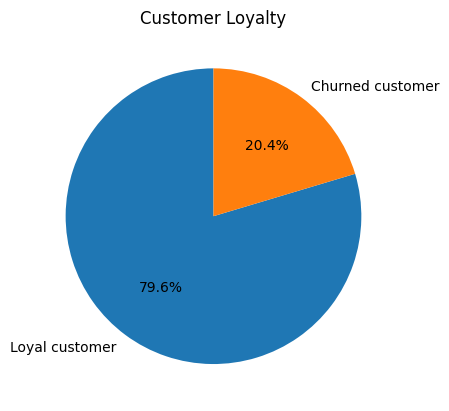

,Exited,count
0,Loyal customer,7963
1,Churned customer,2037


In [ ]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn = pd.read_csv('/Users/konstantingeneralov/IDE/Data/churn.csv')
churn_df = churn.copy()
churn_df = churn_df.drop(columns=['RowNumber'])
churn_df['Exited'] = churn_df['Exited'].map({0: 'Loyal customer', 1: 'Churned customer'})
loyalty = churn_df['Exited'].value_counts().reset_index()

plt.pie(loyalty['count'], labels=loyalty['Exited'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Loyalty')
plt.show()
display(loyalty)
#display(churn_df.head(), churn_df.describe(include='all'), churn_df.info())

По графику мы можем увидеть что почти 80% наших клиентов к нам лояльны. Ушли немного больше 20% или 1/5. Сложно оценить эти данные (плохо это или хорошо) так как нет данных по общей ситуации на рынке.

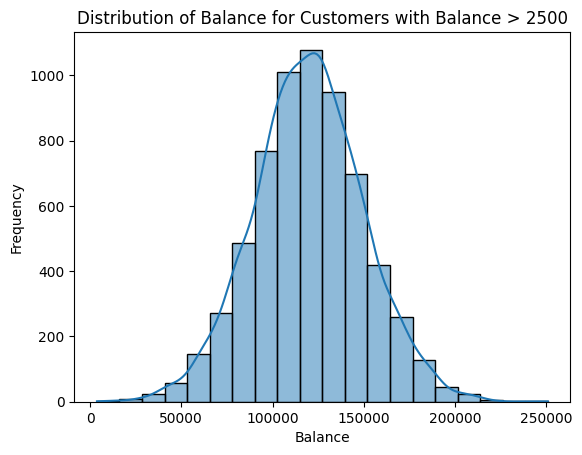

In [6]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.
mask_balanse = churn_df[churn_df['Balance'] > 2500]

sns.histplot(data=mask_balanse, x='Balance', bins=20, kde=True)
plt.title('Distribution of Balance for Customers with Balance > 2500')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Выводы
1. Основная масса клиентов с балансом более 2500 располагается в диапазоне от 100000 до 140000 
2. График симметричный с выраженным большинством в центре и так же видно что меньшие группы с депозитом от 2500 до 90000 и от 160000 до 250000 примерно равны.

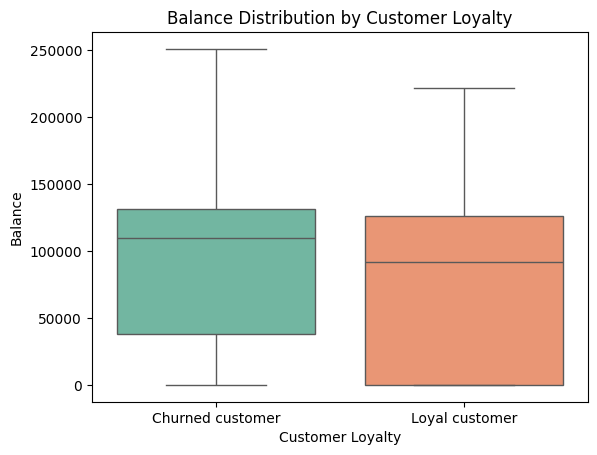

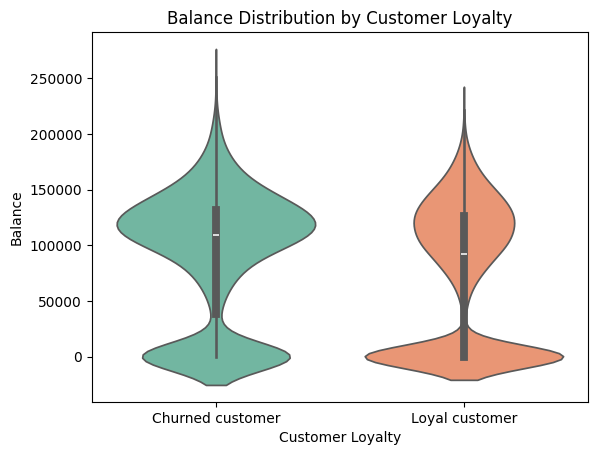

In [7]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
sns.boxplot(data=churn_df, y='Balance', x='Exited',hue='Exited', palette='Set2')
plt.title('Balance Distribution by Customer Loyalty')
plt.xlabel('Customer Loyalty')
plt.ylabel('Balance')
plt.show()

sns.violinplot(data=churn_df, y='Balance', x='Exited',hue='Exited' , palette='Set2')
plt.title('Balance Distribution by Customer Loyalty')
plt.xlabel('Customer Loyalty')
plt.ylabel('Balance')
plt.show()

По этим двум графикам видно 
Начнем с Ушедших пользователей
1. Медиана выше чем у Лояльных и близка к 75 значит у большинства ушедших больше среднего. 
2. 25 перцентиль примерно на 40000 и на скрипичном графике видно что пик около 0 меньше чем у Лояльных, значит у Ушедших доля нулевых балансов меньше.
3. На скрипичном графике видно что основная масса Ушедших клиентов имеет баланс 110000-130000.

Лояльнае
1. Медиана ниже чем у ушедших значит всреднем у лояльных меньше денег на счетах.
2. 25 перцентиль около 0 и большой пик на скрипичном графике говорят о том что значительная часть лояльных клиентов имеют нулевой баланс
3. Еще одня значительная часть клиентов имеет умеренный баланс 90000-110000
4. Меньше клиентов с крупным балансом чем у Ушедших

Обобщим
1. Ушедшие клиенты в среднем богаче.
2. Лояльные более "сконцентрированы" на низких балансах, ушедшие — более разнообразны, обе группы с двумя выраженными группами (нулевые и со средним балансом).
3. У Ушедших больше группа с крупными балансами

Причины Клиенты с крупными балансами это таргет многих конкурентов их стараются переманить. Так же скорее всего такие клиенты более требовательны, следят за разными условиями обслуживания и бонусами лояльности их нужно удерживать.

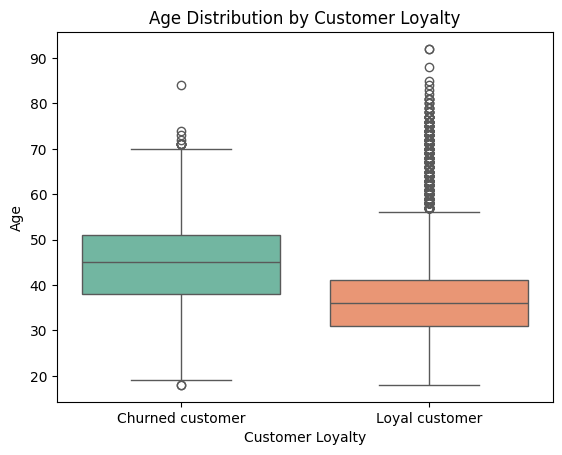

In [53]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

sns.boxplot(data=churn_df, y='Age', x='Exited', hue='Exited', palette='Set2')
plt.title('Age Distribution by Customer Loyalty')
plt.xlabel('Customer Loyalty')
plt.ylabel('Age')
plt.show()

1. Потенциальных выбросов больше в Лояльных клиентах.
2. Я бы обратил внимание на группу людей от 39 до 51 года так как это 50% ушедших и наши лояльные клиенты от 33 до 41 скоро перейдут в эту группу

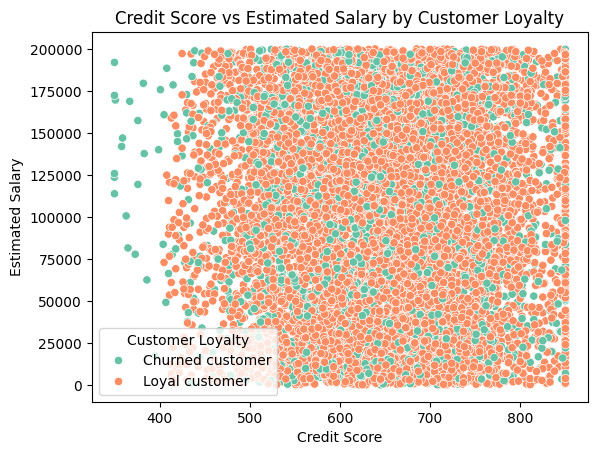

In [22]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.

sns.scatterplot(data=churn_df, x='CreditScore', y='EstimatedSalary', hue='Exited', color='Exited', palette='Set2')
plt.title('Credit Score vs Estimated Salary by Customer Loyalty')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.legend(title='Customer Loyalty')
plt.show()

Здесь сложно отледить взаимосвязь. Судя по распределению точк ее нет.

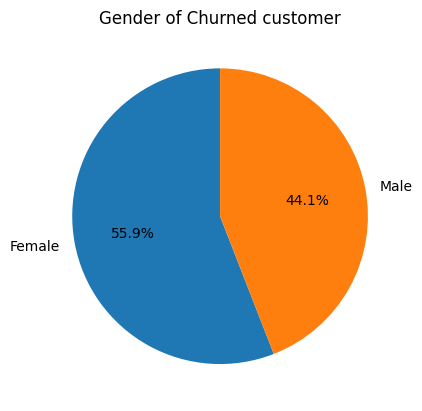

,Gender,count
0,Female,1139
1,Male,898


In [74]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
mask_churned = churn_df[churn_df['Exited']=='Churned customer']
gender_count = mask_churned['Gender'].value_counts().reset_index()
plt.pie(gender_count['count'], labels=gender_count['Gender'], autopct='%1.1f%%', startangle=90)
plt.title('Gender of Churned customer')
plt.show()
display(gender_count)
#display(mask_churned.info(), mask_churned.head(), mask_churned.describe(include='all'))
#display(churn_df.head(), churn_df.info(), churn_df.describe(include='all'))

Уходят чаще женщины но всего на 6%. В целом можно сказать, что нет зависимости от гендера.

,NumOfProducts,Exited,Count
0,1,Churned customer,1409
1,1,Loyal customer,3675
2,2,Churned customer,348
3,2,Loyal customer,4242
4,3,Churned customer,220
5,3,Loyal customer,46
6,4,Churned customer,60


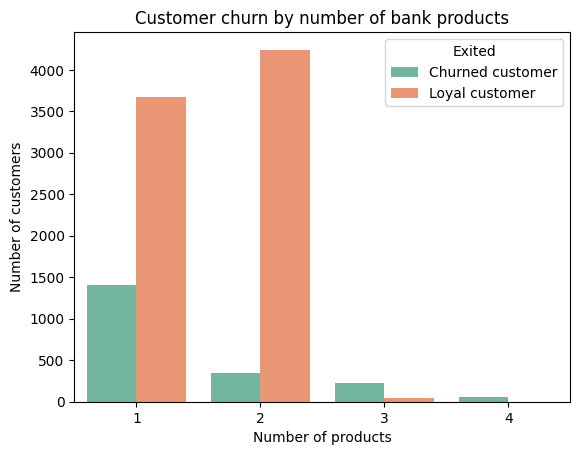

In [ ]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
grouped = churn_df.groupby(['NumOfProducts','Exited']).size().reset_index(name='Count')

sns.barplot(data=grouped, x='NumOfProducts', y= 'Count', hue='Exited', palette='Set2')
plt.title('Customer churn by number of bank products')
plt.ylabel('Number of customers')
plt.xlabel('Number of products')
display(grouped)
#display(churn_df.head(), churn_df.info(), churn_df.describe(include='all'))

Мы видим что уходят в основном клиенты с 1 продуктом. И те клиенты у которых 2 продукта уходят редко. Также видим самое большое число лояльных клиентов среди тех у кого 2 продукта.

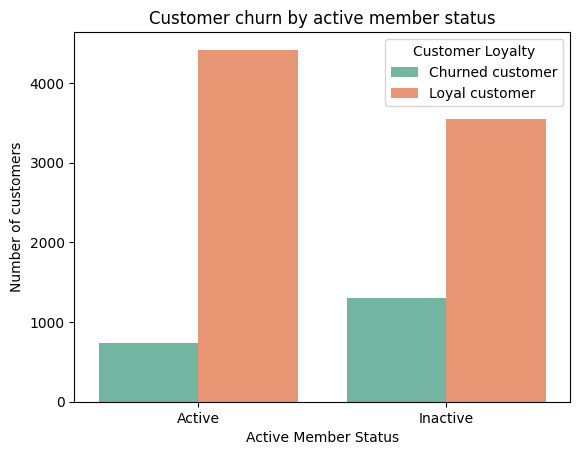

,IsActiveMember,Exited,Count
0,Active,Churned customer,735
1,Active,Loyal customer,4416
2,Inactive,Churned customer,1302
3,Inactive,Loyal customer,3547


In [76]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 
# Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
churn_df['IsActiveMember']=churn['IsActiveMember']
churn_df['IsActiveMember']= churn_df['IsActiveMember'].replace({0:'Inactive', 1:'Active'})
grouped_act = churn_df.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
sns.barplot(data=grouped_act, x='IsActiveMember', y='Count', hue='Exited', palette='Set2')
plt.title('Customer churn by active member status')
plt.ylabel('Number of customers')
plt.xlabel('Active Member Status')
plt.legend(title='Customer Loyalty')
plt.show()
display(grouped_act)
#display(churn_df.head())

Среди активных клиентов ушедших меньше почти в два раза. Можем сделать вывод что активность влияет на отток клиентов. Предложение банку переводить как можно больше клиентов в активные.

In [93]:
#9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
import plotly
import plotly.express as px
import plotly.io as pio
country_group = mask_churned.groupby(['Geography','Exited']).size().reset_index(name='Count')

pio.renderers.default = 'browser'
fig = px.choropleth(
    data_frame= country_group, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Count", #от чего зависит цвет
    range_color=[0, 1000], #диапазон цвета
    title='Churned geography', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

display(country_group)
#display(churn_df.head(), churn_df.info(), churn_df.describe(include='all'))


,Geography,Exited,Count
0,France,Churned customer,810
1,Germany,Churned customer,814
2,Spain,Churned customer,413


не получилось открыть в VS Code нашел способ через браузер. Из графика видно что одинакого уходят люди в Германии и Франции в Испании в половину меньше. Может быть клиенты в Германии и Франции более требовательные к услугам.

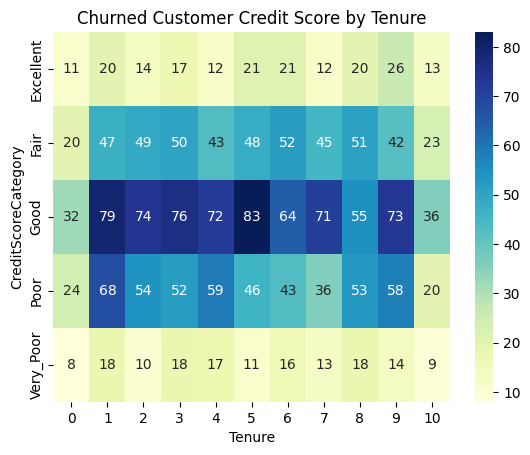

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCategory,,,,,,,,,,,
Excellent,11.0,20.0,14.0,17.0,12.0,21.0,21.0,12.0,20.0,26.0,13.0
Fair,20.0,47.0,49.0,50.0,43.0,48.0,52.0,45.0,51.0,42.0,23.0
Good,32.0,79.0,74.0,76.0,72.0,83.0,64.0,71.0,55.0,73.0,36.0
Poor,24.0,68.0,54.0,52.0,59.0,46.0,43.0,36.0,53.0,58.0,20.0
Very_Poor,8.0,18.0,10.0,18.0,17.0,11.0,16.0,13.0,18.0,14.0,9.0


In [124]:

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score <= 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_df['CreditScoreCategory'] = churn_df['CreditScore'].apply(get_credit_score_cat)
grouped_credit = churn_df.groupby(['CreditScoreCategory', 'Exited', 'Tenure']).size().reset_index(name='Count')
mask_group = grouped_credit[grouped_credit['Exited'] == 'Churned customer']
pivot_credit = mask_group.pivot_table(index='CreditScoreCategory', columns='Tenure', values='Count', aggfunc='mean')
sns.heatmap(data = pivot_credit, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Churned Customer Credit Score by Tenure')
plt.show()
display(pivot_credit)
#display(mask_group)
#display(churn_df.head(), churn_df.info(), churn_df.describe(include='all'))

Судя по тепловой карте чаще всего уходят клиенты с хорошим кредитным рейтингом и чменьше уходят со средним и плохим рейтингом. По годам обслуживания не особо наблюдается зависимость.